# NLP Assignment 1 - Spam Message Classification
### Name: Ishita Gupta
### Roll No: J018

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
#nltk.download()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Renaming columns

In [3]:
drop = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
df = df.drop(df[drop], axis=1)
df.rename(columns = {"v1":"target", "v2":"text"}, inplace = True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### No null values that need to be taken care of

### Target Column Visualization

<AxesSubplot:ylabel='None'>

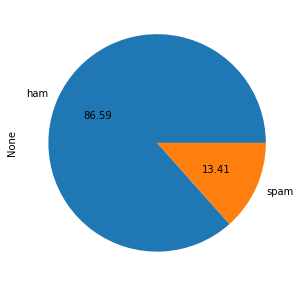

In [5]:
df.groupby('target').size().plot(kind='pie', autopct='%.2f',figsize=(5,5))

In [6]:
from wordcloud import WordCloud, STOPWORDS
stop_words = list(STOPWORDS)

### Word Cloud of target classes

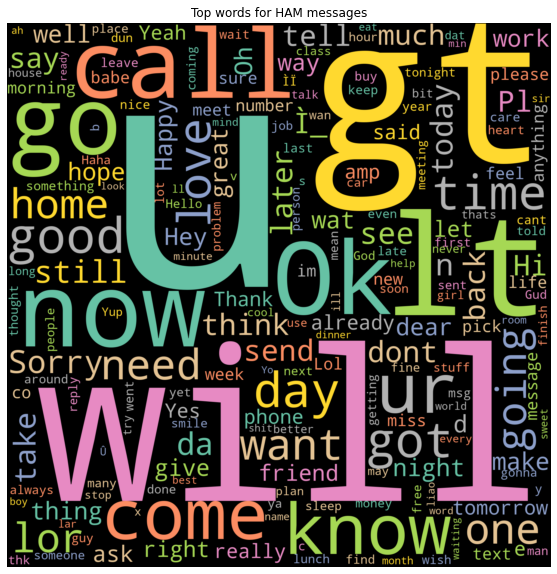

In [7]:
wc_ham = WordCloud(width = 2000, height = 2000, random_state=1, background_color='black', colormap='Set2', 
               collocations=False, stopwords = stop_words).generate(' '.join(text for text in df.loc[df['target'] == 'ham', 'text']))
plt.figure(figsize=(10,10))
plt.title('Top words for HAM messages')
plt.imshow(wc_ham, interpolation='bilinear')
plt.axis("off")
plt.show()

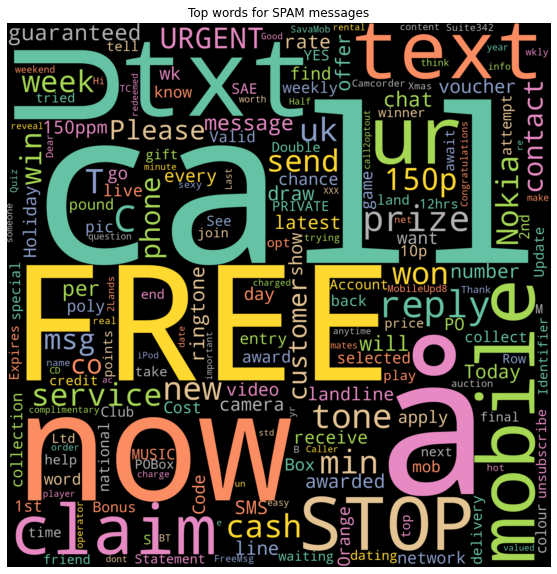

In [8]:
wc_spam = WordCloud(width = 2000, height = 2000, random_state=1, background_color='black', colormap='Set2', 
               collocations=False, stopwords = stop_words).generate(' '.join(text for text in df.loc[df['target'] == 'spam', 'text']))
plt.figure(figsize=(10,10))
plt.title('Top words for SPAM messages')
plt.imshow(wc_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

### Data Pre-Processing

#### Tokenization, Removing Stopwords, Stemming

In [9]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

In [10]:
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
final_corpus = []
stemmer = LancasterStemmer()

for i in range(len(df)):
  word = word_tokenize(df['text'][i].lower())
  word = [stemmer.stem(y) for y in word if y not in stuff_to_be_removed]
  j = " ".join(word)
  final_corpus.append(j)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(final_corpus)
print(type(vector))
X = vector.toarray()
y=df['target']

<class 'scipy.sparse.csr.csr_matrix'>


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Model Building

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold

In [14]:
models=[]
models.append(('svm',SVC(gamma='auto')))
models.append(('lr',LogisticRegression()))
models.append(('XGB',XGBClassifier()))
models.append(('decision tree',DecisionTreeClassifier()))
models.append(('naive bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Adaboost',AdaBoostClassifier()))
models.append(('knn',KNeighborsClassifier()))
models.append(('XGB',XGBClassifier()))

### Model Performance

In [15]:
from sklearn.metrics import classification_report
for name,model in models:
  print('-------------------------------------------------------------------')
  print(name)
  model.fit(X_train,y_train)
  predict=model.predict(X_test)
  print(classification_report(predict,y_test))
  print('-------------------------------------------------------------------')

-------------------------------------------------------------------
svm
              precision    recall  f1-score   support

         ham       1.00      0.86      0.93      1839
        spam       0.00      0.00      0.00         0

    accuracy                           0.86      1839
   macro avg       0.50      0.43      0.46      1839
weighted avg       1.00      0.86      0.93      1839

-------------------------------------------------------------------
-------------------------------------------------------------------
lr
              precision    recall  f1-score   support

         ham       0.99      0.94      0.97      1676
        spam       0.62      0.95      0.75       163

    accuracy                           0.94      1839
   macro avg       0.81      0.95      0.86      1839
weighted avg       0.96      0.94      0.95      1839

-------------------------------------------------------------------
-------------------------------------------------------------------

#### Random Forest and XGB give the highest accuracy